In [13]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import datetime
import matplotlib.pylab as plt
import os

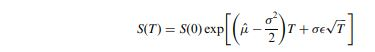

The above stochastic equation of a stock is used to simulate the paths of the underlying stock and discounted payoff of each path is calculated for each option type (Call & Put) at the end of expiry and then mean of the all the payoffs is calculated. 
type= 1 (Call) & 0(put), sigma=volatility, S0=starting price, R = Expected return = Risk free rate for risk neutral valuation, intervals = smaller number of time intervals for T, simulations = no runs for MC, K = Strike price

In [14]:
#The below Monte Carlo simulation function generates simulated paths using stochastoc equation of a stock and then calculates the discounted payoff for each paths for each option type (Call & Put)

def price_mc(sigma,S0,R,intervals,simulations,K,type): 
    
    payoffs=[]
    T=1.0     #default T is equal to 1 year
    for j in range(simulations):
        sp.random.seed(12345+j)
        ST=S0*np.exp((R-(sigma**2)/2)*(T/intervals)+sigma*np.random.normal(0,1)*np.sqrt(T/intervals))
        
        
        if type==1:
            pay=np.exp(-R*T/intervals)*max(ST-K,0)
        elif type==0:
            pay=np.exp(-R*T/intervals)*max(K-ST,0)
        payoffs.append(pay) 
    return np.mean(payoffs)


In [15]:
price_mc(0.25,100,0.1,12,500000,101,0) 

2.964287854488859

In [16]:
def price_mcurve(sigma,S0,R,intervals,simulations,K,type):
    
    payoffs=[]
    T=1.0     #default T is equal to 1 year
    for j in range(simulations):
        sp.random.seed(12345+j)
        ST=S0*np.exp((R-(sigma**2)/2)*(T/intervals)+sigma*np.random.normal(0,1)*np.sqrt(T/intervals))
        
        
        if type==1:
            pay=np.exp(-R*T/intervals)*max(ST-K,0)
        elif type==0:
            pay=np.exp(-R*T/intervals)*max(K-ST,0)
        payoffs.append(pay) 
    #print prices
    plt.plot(payoffs)
    plt.title('Stock Movement Using Monte Carlo Simulation')
    plt.ylabel('stock price')
    plt.xlabel('steps')
    plt.show()

    return plt.show()


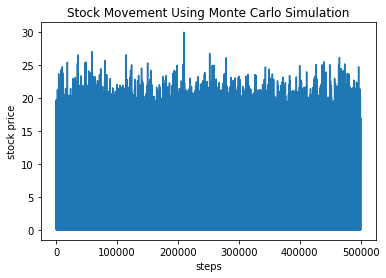

In [17]:
price_mcurve(0.25,100,0.1,12,500000,101,0)